*파이썬 머신러닝 완벽 가이드 p.116~p.144*



> **05. 데이터 전처리**

**데이터 인코딩 - 레이블 인코딩**

- 문자열 값을 숫자형 카테고리 값으로 변환
- 문제점: 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문에, 더 큰 값에 특정 ML 알고리즘에서 가중치가 더 부여될 수 있다.

In [1]:
# 레이블 인코딩: 카테고리 피처를 코드형 숫자 값으로 변환
# LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출

from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#LableEncoder를 객체로 생성 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


- 0번부터 인코딩됨

In [4]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


**데이터 인코딩 - 원-핫 인코딩(One-Hot Encoding)**

- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
- 원-핫(여러 개의 속성 중 단 한 개의 속성만 1로 표시) 인코딩
- 입력값으로 2차원 데이터가 필요, OneHotEncoder를 이용해 변환한 값이 희소 행렬(Sparse Matrix) 형태이므로 이를 다시 toarray() 메서드를 이용해 밀집
행렬(Dense Matrix)로 변환해야 함.

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- get_dummies(): 원-핫 인코딩을 더 쉽게 지원하는 판다스의 API

- 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환 가능

In [7]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


**피처 스케일링과 정규화**

- 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업(표준화, 정규화)

- 표준화: 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
- 정규화: 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념


---


- 벡터 정규화: 단, 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미

**StandardScaler**

표준화를 쉽게 지원하기 위한 클래스로, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit(), transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됨

**MinMaxScaler**

- 데이터값을 0과 1 사이의 범위 값으로 변환(음수 값이 있으면 -1 에서 1값으로 변환)

In [10]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit(), transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 ndarray로 반환돼 이를 dataframe으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**

- fit(): 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용.
- transform(): 설정된 정보를 이용해 데이터를 변환.
- fit_transform(): fit()과 transform()을 한 번에 적용하는 기능을 수행.


---


- 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [11]:
# 테스트 데이터에 fit()을 적용할 때 발생하는 문제

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트 생성
# Sclaer 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [12]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터값 지정하지 않으면 0~1로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터변환. 원본 10->1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [13]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로
변환되는 결과를 초래함.
- 따라서 테스트 데이터에 다시 fit()을 적용해서는 안 되며 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함.

In [14]:
# 테스트 데이터에 fit()을 호출하지 않고
# 학습 데이터로 fit()을 수행한 MinMaxScaler 객체의 transform()을 이용해 데이터를 변환

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [16]:
# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- fit_transform()은 fit()과 transform()을 순차적으로 수행하는 메서드이므로 학습 데이터에서는 상관없지만 테스트 데이터에서는 절대 사용해서는 안됨.

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환



---





> **06. 사이킷런으로 수행하는 타이타닉 생존자 예측**



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [20]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
print('### 학습 데이터 정보 ### \n')
print(titanic_df.info())

### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- Rangeindex가 891entries이므로 891개의 로우로 구성.

- 칼럼 수는 12개로, 2개의 칼럼이 float64 타입, 5개의 칼럼이 int64 타입, 5개의 칼럼이 object 타입임(판다스의 object 타입은 string 타입으로 봐도 무방)

- Age, Cabin, Embarked 칼럼은 각각 714개, 204개, 889개의 Not Null 값을 가지고 있으므로 각각 177개, 608개, 2개의 Null값(NaN)을 가지고 있음.

In [22]:
# DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경
# Age의 경우는 평균 나이, 나머지 칼럼은 'N'값으로 변경

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수 0


In [23]:
# 남아있는 문자열 피처 Sex, Cabin, Embarked

print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

Cabin 값 분포:
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [24]:
# Cabin 속성에서 앞 문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [25]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

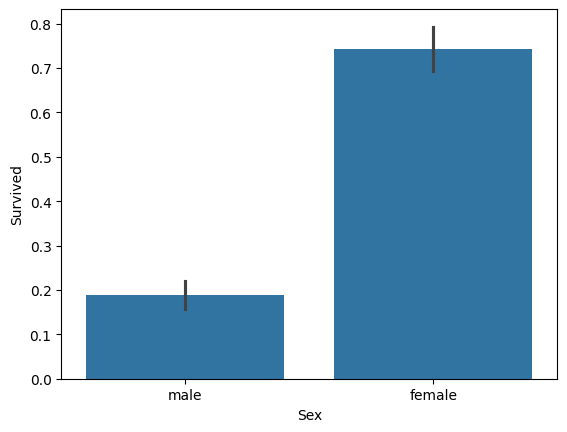

In [26]:
# 시각화는 시본(Seaborn) 패키지를 이용

sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

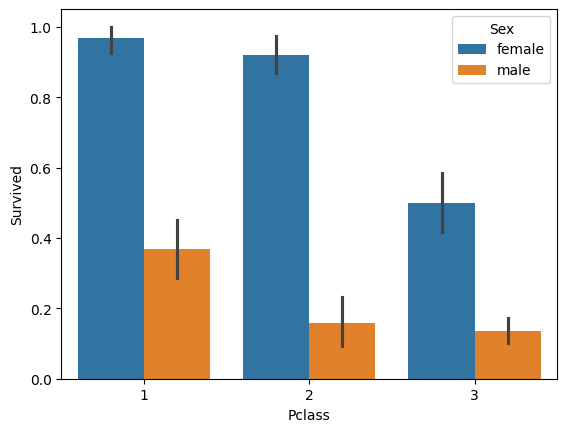

In [27]:
# 객실 등급별 성별에 따른 생존 확률 시각화
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성의 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐.
- 남성의 경우는 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음.

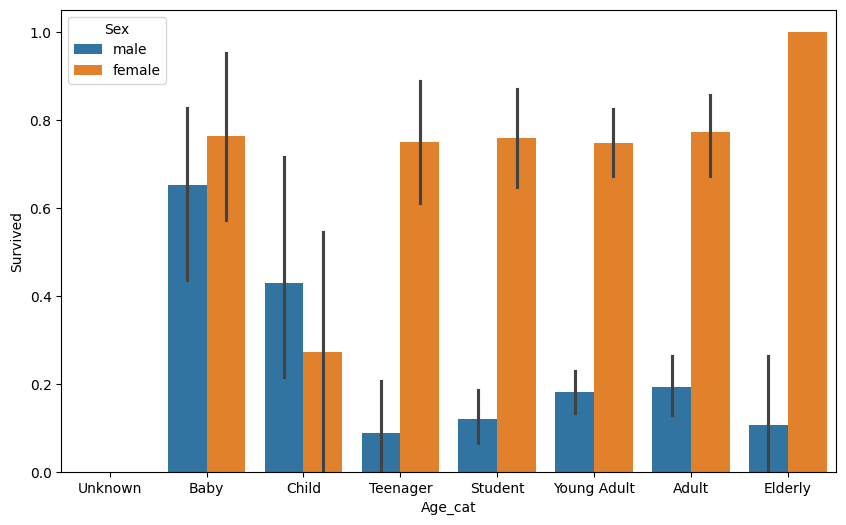

In [28]:
# Age에 따른 생존 확률
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.

def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# x축의 값 순차적으로 표시
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambdaa 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 여자 Baby의 경우 비교적 생존 확률이 높음.
- 여자 Child의 경우는 다른 연령대에 비해 생존 확률이 낮음.
- 여자 Elderly의 경우는 매우 생존 확률이 높음.

In [29]:
# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- Sex, Cabin, Embarked 속성이 숫자형으로 바뀜.

In [31]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 추출한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

- 데이터 전처리를 수행하는 transform_features() 함수를 만들었으니, 이 함수를 이용해 다시 원본 데이터 가공

In [32]:
# 원본 데이터를 재로딩하고, 피처 데이터세트와 레이블 데이터세트 추출
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [33]:
# train_test_split() API를 이용해 별도의 테스트 데이터세트를 추출.
# 테스트 데이터 세트 크기는 전체의 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

- 사이킷런은 결정 트리를 위해서 DecisionTreeClassifier
- 랜덤 포레스트를 위해 RandomForestClassifier
- 로지스틱 회귀를 위해 LogisticRegression 클래스를 제공


---

- 사이킷런 클래스를 이용해 train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고(fit), 예측(predict)함.
- 예측 성능 평가는 정확도로 하며, accuracy_score() API를 사용
- LogisticRegression의 생성 인자로 입력된 solver—iblinear1 는 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정 트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTree 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticReg 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTree 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8659


- 3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있음.

In [39]:
## 교차 검증으로 결정 트리 모델을 평가
# 교차 검증을 위한 사이킷런 model selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용
# KFold 클래스

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체 생성
    # 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    # 5개 fold에서 평군 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


- 평균 정확도는 약 78.23%

In [41]:
# cross_val_score() API를 이용

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print('평균정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균정확도: 0.7879


- cross_val_score( )와 K 폴드의 평균 정확도가 약간 다른 이유: cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문

In [43]:
# GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측성능 측정
# CV는 5개의 폴드 세트를 지정
# 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능을 측정
# 최적 하이퍼 파라미터와 그때의 예측을 출력
# 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 예측정확도 출력

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715




> **07. 정리**

- 데이터의 전처리 작업: 오류 데이터의 보정이나 결손값(Null) 처리 등의 다앙한 데이터 클렌징 작업, 레이블 인코딩이나 원-핫 인코딩과 같은 인코딩 작업, 그리고 데이터의 스케일링/정규화 작업 등으로 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전 처리하는 것.
- 머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 함.

- 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가 -> 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높음.
- 이를 해결하기 위해 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차 검증을 수행할 수 있음.
- 사이킷런은 이러한 교차 검증을 지원하기 위해 KFold, StratifiedKFold, cross_val_score() 등의 다양한 클래스와 함수를 제공.
- 또한 머신러닝 모델의 최적의 하이퍼 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공.

